# PYTHON IMPLEMENTATION FOR PARAMETER VALUES OF THE MEAN-REVERSION (CIR) TEMPERATURE MODEL 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(12)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tt=pd.read_excel('my_research_temp_data.xlsx')
data_in = np.array(tt['Annual Mean'])
data = data_in[-62:]
yrs = np.array(tt['Category'])
years = yrs[-62:]

## DESCRIPTIVE STATISTICS FOR THE ACTUAL TEMPERATURE DATA

In [3]:
# Convert the NumPy array to a pandas Series
data_series = pd.Series(data)

# Compute descriptive statistics
descriptive_stats = data_series.describe()

print(descriptive_stats)

count    62.000000
mean     27.426290
std       0.418758
min      26.480000
25%      27.177500
50%      27.420000
75%      27.740000
max      28.300000
dtype: float64


In [4]:
# Step 1: Compute Y and X
def compute_Y_X(data, delta_t):
    n = len(data)
    Y = np.zeros(n - 1)
    X = np.zeros((n - 1, 2))
    
    for i in range(n - 1):
        Y[i] = (data[i + 1] - data[i]) / np.sqrt(np.abs(data[i]))
        X[i, 0] = (delta_t / np.sqrt(np.abs(data[i])))
        X[i, 1] = np.sqrt(np.abs(data[i])) * delta_t
    
    return Y, X

# Step 2: Compute beta_hat
def compute_C_hat(Y, X):
    X_transpose_X_inv = np.linalg.inv(X.T @ X)
    C_hat = X_transpose_X_inv @ X.T @ Y
    alpha = -C_hat[1]
    Tbar = C_hat[0] / alpha
    return C_hat, alpha, Tbar

# Step 3: Compute Y and X
delta_t = 1  # Time Step
Y, X = compute_Y_X(data, delta_t)

# Step 4: Compute beta_hat
C_hat, alpha, Tbar = compute_C_hat(Y, X)

# Step 5: Compute beta
def compute_beta(data, delta_t):
    Y, X = compute_Y_X(data, delta_t)
    C_hat, alpha, Tbar = compute_C_hat(Y, X)
    Y_pred = X.dot(C_hat)
    residuals = Y - Y_pred
    
    summ_sq_r = np.sum(residuals ** 2)
    total_summ_sq = np.sum((Y - np.mean(Y)) ** 2)
    mse = summ_sq_r / len(Y)
    
    print(f'Sum of Squared Errors: {summ_sq_r}')
    print(f'Total Sum of Squares: {total_summ_sq}')
    print(f'MSE: {round(mse * 100, 4)}%')
    
    beta_hat = np.sqrt(np.var(residuals) / delta_t)
    
    return beta_hat

# Compute predicted data
predicted_data = X.dot(C_hat)


# Example parameters
beta_hat = compute_beta(data, delta_t)
print(f'My Estimated Params are: [alpha: {alpha}, Tbar: {Tbar}, beta_hat: {beta_hat}]')

Sum of Squared Errors: 0.18697918024211393
Total Sum of Squares: 0.21933732957715465
MSE: 0.3065%
My Estimated Params are: [alpha: 0.2886376653569112, Tbar: 27.463908417676507, beta_hat: 0.05536454156752402]


## PLOTTING TIME SERIES GRAPH FOR THE ACTUAL TEMPERATURE DATA FOR VISUALISATION


Text(0.5, 1.0, 'Time Series for the Actual Temperature Data')

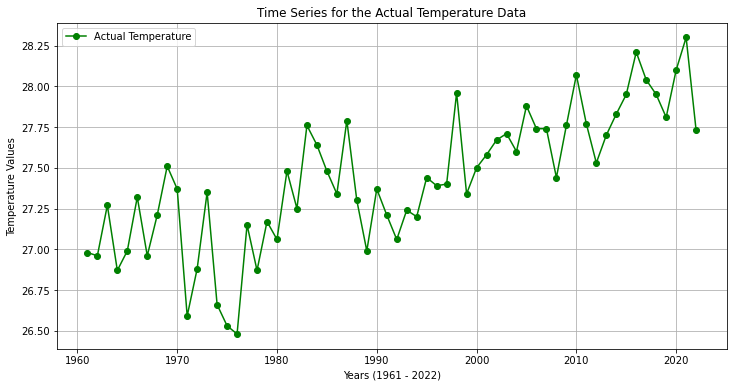

In [5]:
assert len(years) == len(data)
plt.figure(figsize=(12, 6))
plt.plot(years, data, label='Actual Temperature', color='green', marker='o')
plt.xlabel('Years (1961 - 2022)')
plt.ylabel('Temperature Values')
plt.legend()
plt.grid(True)
plt.title('Time Series for the Actual Temperature Data')
#plt.savefig('TIME_SERIES_TEMPERATURE.png', facecolor='w')
#plt.show()

## BOX PLOT FOR VISUALISATION OF THE ACTUAL DATA 

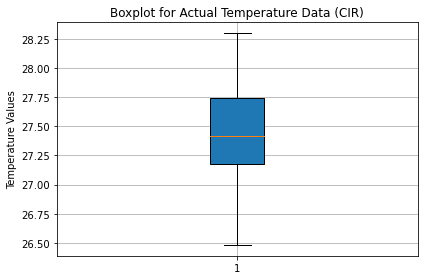

In [6]:
#plt.figure(figsize=(8, 6))
plt.boxplot(data, vert=True, patch_artist=True)
plt.title('Boxplot for Actual Temperature Data (CIR)')
plt.ylabel('Temperature Values')
plt.grid(True)
plt.tight_layout()
#plt.savefig('CIR_BOXPLOT_ACTUAL_TEMPERATURE.png', facecolor='w')
plt.show()

## HISTOGRAM FOR VISUALISATION OF THE ACTUAL TEMPERATURE DATA 

Skewness = -0.18407126215971129


Text(0.7, 0.9, 'Skewness = -0.1841')

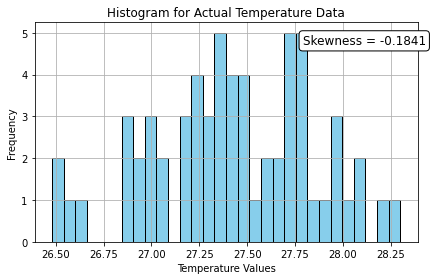

In [7]:
# plt.figure(figsize=(10, 5))
plt.hist(data, bins=30, edgecolor='black',color='skyblue')
plt.xlabel('Temperature Values')
plt.ylabel('Frequency')
plt.title('Histogram for Actual Temperature Data')
plt.grid(True)
plt.tight_layout()

skewness = stats.skew(data)
print('Skewness =', skewness)

plt.annotate(f'Skewness = {skewness:.4f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

#plt.savefig('CIR_HISTOGRAM_ACTUAL_TEMPERATURE.png', facecolor='w')
#plt.show()

## PLOTTING THE ACTUAL AGAINST PREDICTED VALUES FOR VISUALISATION


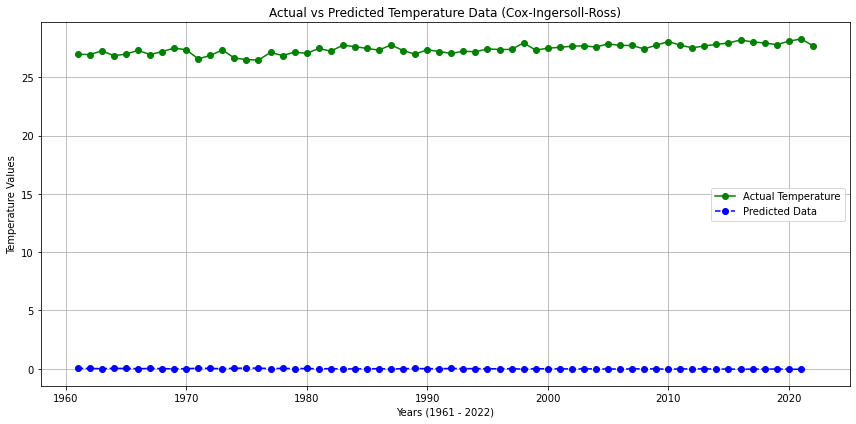

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(years, data, label='Actual Temperature', color='green', marker='o')
plt.plot(years[:-1], predicted_data, label='Predicted Data', color='blue', marker='o', linestyle='--')
plt.xlabel('Years (1961 - 2022)')
plt.ylabel('Temperature Values')
plt.legend()
plt.grid(True)
plt.title('Actual vs Predicted Temperature Data (Cox-Ingersoll-Ross)')
plt.tight_layout()
#plt.savefig('CIR_ACTUAL_VS_PREDICTED_TEMPERATURE.png', facecolor='w')
plt.show()

## PLOTTING THE PREDICTED VALUES FOR VISUALISATION


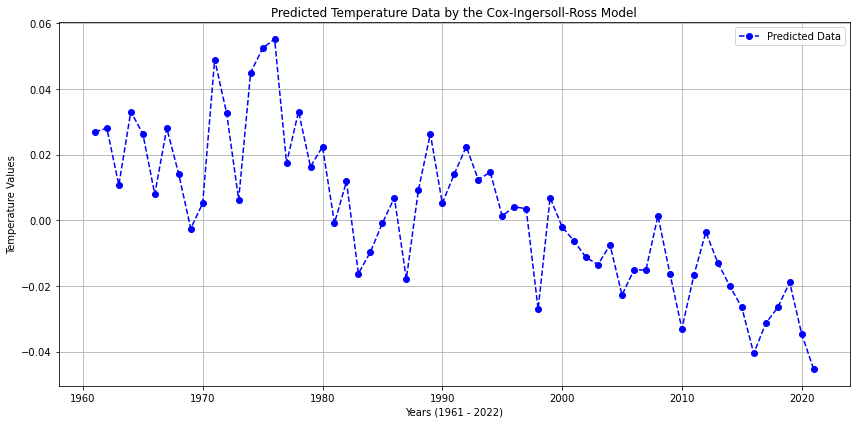

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(years[:-1], predicted_data, label='Predicted Data', color='blue', marker='o', linestyle='--')
plt.xlabel('Years (1961 - 2022)')
plt.ylabel('Temperature Values')
plt.legend()
plt.grid(True)
plt.title('Predicted Temperature Data by the Cox-Ingersoll-Ross Model')
plt.tight_layout()

#plt.savefig('CIR_PREDICTED_TEMPERATURE.png', facecolor='w')
plt.show()

## HISTOGRAM FOR VISUALISATION OF THE PREDICTED DATA 

Skewness = 0.190553558753335


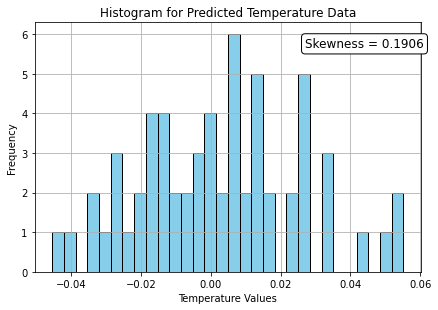

In [10]:
predicted_data = X.dot(C_hat)

plt.hist(predicted_data
         , bins=30, edgecolor='black', color='skyblue')
plt.grid(True)
plt.tight_layout()
plt.title('Histogram for Predicted Temperature Data')
plt.xlabel('Temperature Values')
plt.ylabel('Frequency')

skewness = stats.skew(predicted_data)
print('Skewness =', skewness)

plt.annotate(f'Skewness = {skewness:.4f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

#plt.savefig('CIR_HISTOGRAM_PREDICTED_TEMPERATURE.png', facecolor='w')
plt.show()

## DESCRIPTIVE STATISTICS FOR PREDICTED VALUES

In [11]:
data_series = pd.Series(predicted_data)
descriptive_stats = data_series.describe()
print(descriptive_stats)

count    61.000000
mean      0.002523
std       0.023223
min      -0.045364
25%      -0.015130
50%       0.003524
75%       0.016275
max       0.055189
dtype: float64


## THE MONTE CARLO SIMULATION OF PATHS 

In [12]:
def cir(T_0, alpha, Tbar, beta, T, N, M):
    dt = T / N
    sqrt_dt = np.sqrt(dt)
    temp = np.zeros((M, N + 1))
    temp[:, 0] = T_0
    
    for i in range(N):
        dW_T = np.random.normal(0, 1, size=M)
        temp[:, i + 1] = np.maximum(0, temp[:, i]) + alpha * (Tbar - np.maximum(0, temp[:, i])) * dt + beta * np.sqrt(np.maximum(0, temp[:, i]))*sqrt_dt * dW_T

    return temp

# Parameters
M = 1000 # Number of paths for MC
T = 61 # Total time (61 years)
N = 61 # Number of steps
T_0 = tt['Annual Mean'].iloc[0] # Initial temperature
alpha = 0.2886376653569112 
Tbar = 27.463908417676507 
beta_hat = 0.05536454156752402 

# Time vector
t = np.linspace(0, T, N + 1)

# Simulate paths
temp = cir(T_0, alpha, Tbar, beta_hat, T, N, M)

# Compute mean path
mean_path_simul = np.mean(temp, axis=0)

## HISTOGRAM FOR ONE SIMULATED TEMPERATURE PATH 

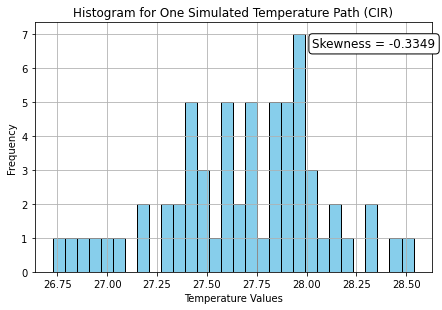

In [13]:
#plt.figure(figsize=(10, 6))
plt.hist(temp[0,:], bins=30, edgecolor='black', color='skyblue')
plt.grid(True)
plt.tight_layout()
plt.title('Histogram for One Simulated Temperature Path (CIR)')
plt.xlabel('Temperature Values')
plt.ylabel('Frequency')

skewness = stats.skew(temp[0,:])
#plt.text(0.7, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes)
plt.annotate(f'Skewness = {skewness:.4f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

#plt.savefig('CIR_HISTOGRAM_ONE_SIMULATED_TEMPERATURE.png', facecolor='w')
plt.show()

## DESCRIPTIVE STATISTICS FOR ALL SIMULATED PATHS COMBINED

In [14]:
combined_data = temp.flatten()
combined_data_series = pd.Series(combined_data)
combined_stats = combined_data_series.describe()

print(combined_stats)

count    62000.000000
mean        27.437393
std          0.415149
min         25.624041
25%         27.144262
50%         27.430903
75%         27.716315
max         29.062143
dtype: float64


## PLOTTING THE GRAPH OF THOUSAND SIMULATED PATH FOR VISUALISATION


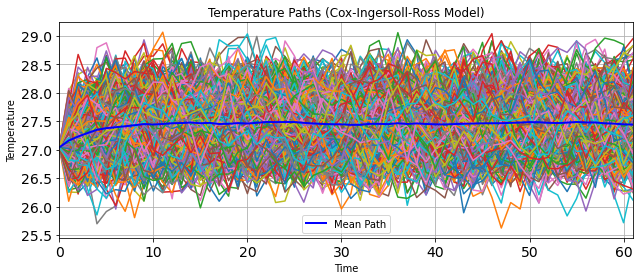

In [15]:
plt.figure(figsize=(9, 4))
for i in range(M):
    plt.plot(t, temp[i])  
plt.plot(t, mean_path_simul, color='blue', linewidth=2, label='Mean Path')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Paths (Cox-Ingersoll-Ross Model)')
plt.xlim([0, T])  
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.savefig('CIR_THOUSAND_PATHS_TEMPERATURE.png', facecolor='w')
#plt.show()


## PLOTTING THE MEAN OF SIMULATED PATHS FOR VISUALISATION

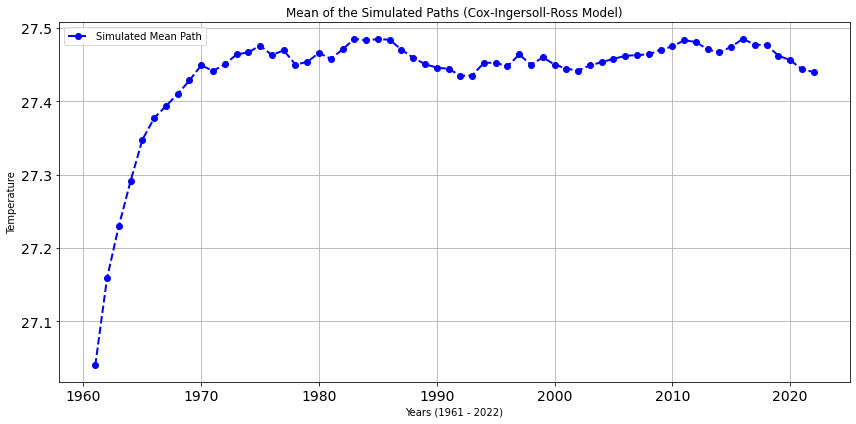

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(years, mean_path_simul, color='blue', linewidth=2, label='Simulated Mean Path', marker='o', linestyle='--')
plt.xlabel('Years (1961 - 2022)')
plt.ylabel('Temperature')
plt.title('Mean of the Simulated Paths (Cox-Ingersoll-Ross Model)')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.legend()
#plt.savefig('CIR_MEAN_SIMUL_TEMPERATURE.png', facecolor='w')
plt.show()

## PLOTTING THE ACTUAL AGAINST MEAN OF SIMULATED PATHS FOR VISUALISATION

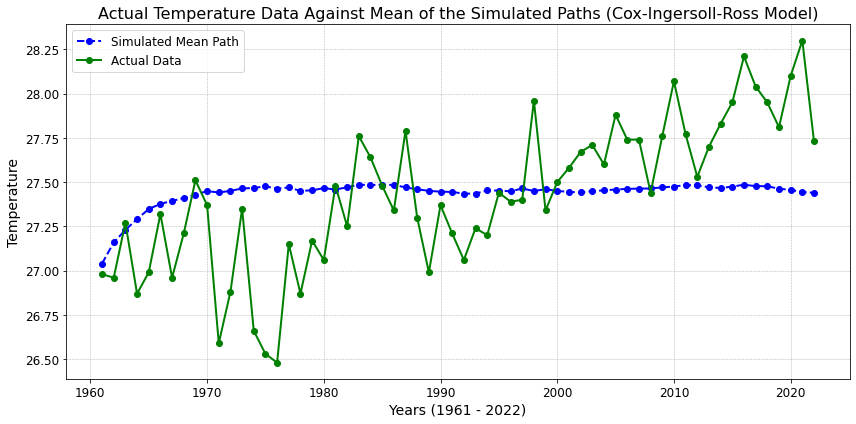

In [17]:
plt.figure(figsize=(12, 6)) 
plt.plot(years, mean_path_simul, color='blue', linewidth=2, linestyle='--', marker='o', label='Simulated Mean Path')
plt.plot(years, data, color='green', linewidth=2, marker='o', label='Actual Data')
plt.title('Actual Temperature Data Against Mean of the Simulated Paths (Cox-Ingersoll-Ross Model)', fontsize=16)
plt.xlabel('Years (1961 - 2022)', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend(fontsize=12)
#plt.savefig('CIR_ACTUAL_VS_MEAN_SIMUL_TEMPERATURE.png', facecolor='w')
plt.show()


## PLOTTING THE ACTUAL DATA AGAINST ONE SIMULATED PATH FOR VISUALISATION

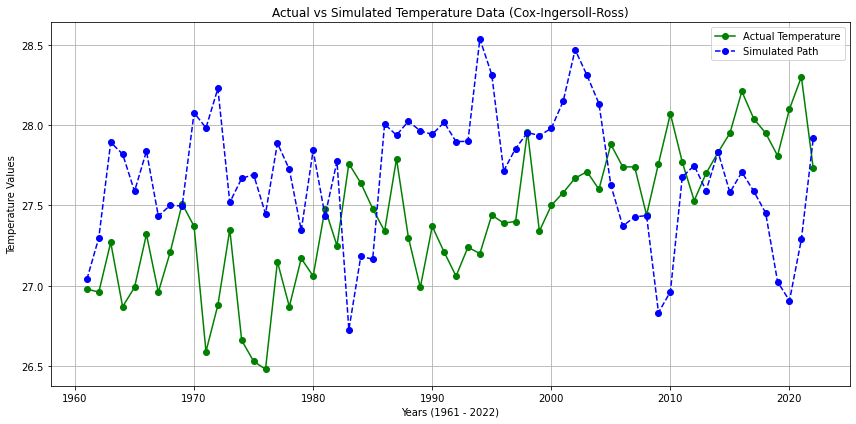

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(years, data, label='Actual Temperature', color='green', marker='o')
plt.plot(years, temp[0], label='Simulated Path', color='blue', linestyle='--', marker='o')
plt.xlabel('Years (1961 - 2022)')
plt.ylabel('Temperature Values')
plt.legend()
plt.grid(True)
plt.title('Actual vs Simulated Temperature Data (Cox-Ingersoll-Ross)')
plt.savefig('CIR_ACTUAL_VS_ONE_SIMULATED_TEMPERATURE.png', facecolor='w')
plt.tight_layout()
#plt.show()

## BOX PLOT FOR VISUALISATION OF THE SIMULATED DATA 

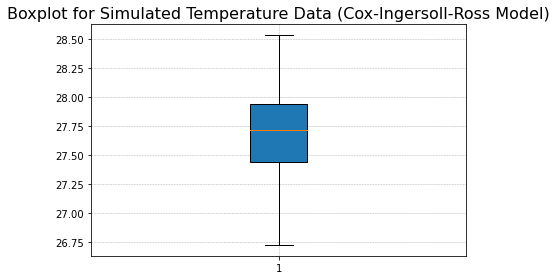

In [19]:
#plt.figure(figsize=(10, 6)) 
plt.boxplot(temp[0, :],vert=True, patch_artist=True)
plt.title('Boxplot for Simulated Temperature Data (Cox-Ingersoll-Ross Model)', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
#plt.savefig('CIR_BOXPLOT_SIMUL_TEMPERATURE.png', facecolor='w')
plt.show()


## HISTOGRAM FOR VISUALISATION OF THE SIMULATED DATA 

Skewness = -0.33488108782645115


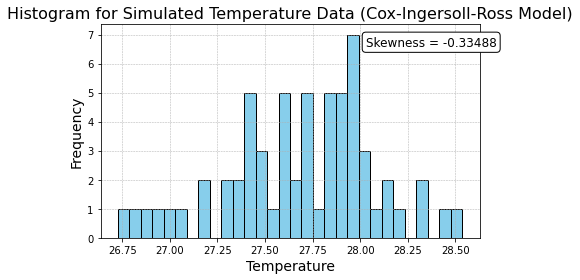

In [20]:
#plt.figure(figsize=(12, 8))
plt.hist(temp[0, :], bins=30, edgecolor='black',color='skyblue')
plt.title('Histogram for Simulated Temperature Data (Cox-Ingersoll-Ross Model)', fontsize=16)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
Skewness = stats.skew(temp[0, :])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
print('Skewness =', Skewness)
plt.annotate(f'Skewness = {skewness:.5f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

#plt.savefig('CIR_HISTOGRAM_SIMUL_TEMPERATURE.png', facecolor='w')
plt.show()

# PYTHON IMPLEMENTATION FOR PARAMETER VALUES OF THE MEAN-REVERSION (CIR) PRECIPITATION MODEL

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(12)

In [22]:
#Precipitation data
rr=pd.read_csv('observed-annual-precipitation-of-ghana-for-1901-2022.csv')
data_inn = np.array(rr['Annual Mean'])
data_precip = data_inn[-62:]
yrs = np.array(rr['Category'])
years = yrs[-62:]

## THE NORMALIZATION OF RAINFALL DATA

In [23]:
# Log transformation
def log_transform(data_precip):
    # Adding 1 to avoid log(0) if there are zero values
    normalized_data = np.log(data_precip + 1)
    
    return normalized_data

normalized_data = log_transform(data_precip)

## DESCRIPTIVE STATISTICS FOR THE ACTUAL PRECIPITATION DATA

In [24]:
# Convert the log-transformed NumPy array to a pandas Series
log_series = pd.Series(normalized_data, name='Annual Mean Log Transformed')

# Compute descriptive statistics
descriptive_stats = log_series.describe()

print(descriptive_stats)

count    62.000000
mean      7.102308
std       0.113705
min       6.746048
25%       7.049116
50%       7.103758
75%       7.141720
max       7.482620
Name: Annual Mean Log Transformed, dtype: float64


In [25]:
# Step 1: Compute Y and X
def compute_Y_X(normalized_data, delta_t):
    n = len(normalized_data)
    Y = np.zeros(n - 1)
    X = np.zeros((n - 1, 2))
    
    for i in range(n - 1):
        Y[i] = (normalized_data[i + 1] - normalized_data[i]) / np.sqrt(np.abs(normalized_data[i]))
        X[i, 0] = (delta_t / np.sqrt(np.abs(normalized_data[i])))
        X[i, 1] = np.sqrt(np.abs(normalized_data[i])) * delta_t
    
    return Y, X

# Step 2: Compute beta_hat
def compute_C_hat(Y, X):
    X_transpose_X_inv = np.linalg.inv(X.T @ X)
    C_hat = X_transpose_X_inv @ X.T @ Y
    gamma = -C_hat[1]
    Rbar = C_hat[0] / gamma
    return C_hat, gamma, Rbar

# Step 3: Compute Y and X
delta_t = 1  # Time Step
Y, X = compute_Y_X(normalized_data, delta_t)

# Step 4: Compute delta_hat
C_hat, gamma, Rbar = compute_C_hat(Y, X)

# Step 5: Compute delta
def compute_delta(normalized_data, delta_t):
    Y, X = compute_Y_X(normalized_data, delta_t)
    C_hat, gamma, Rbar = compute_C_hat(Y, X)
    Y_pred = X.dot(C_hat)
    residuals = Y - Y_pred
    
    summ_sq_r = np.sum(residuals ** 2)
    total_summ_sq = np.sum((Y - np.mean(Y)) ** 2)
    mse = summ_sq_r / len(Y)
    
    print(f'Sum of Squared Errors: {summ_sq_r}')
    print(f'Total Sum of Squares: {total_summ_sq}')
    print(f'MSE: {round(mse * 100, 4)}%')
    
    delta_hat = np.sqrt(np.var(residuals) / delta_t)
    
    return delta_hat

# Example parameters
delta_hat = compute_delta(normalized_data, delta_t)
print(f'My Estimated Params are: [gamma: {gamma}, Rbar: {Rbar}, delta_hat: {delta_hat}]')

Sum of Squared Errors: 0.10944005288080107
Total Sum of Squares: 0.20442445872002812
MSE: 0.1794%
My Estimated Params are: [gamma: 0.9267227175571794, Rbar: 7.103812260785402, delta_hat: 0.042356808514400435]


## PLOTTING TIME SERIES GRAPH FOR THE ACTUAL PRECIPITATION (RAINFALL) DATA FOR VISUALISATION


Text(0.5, 1.0, 'Time Series for the Actual Precipitation Data')

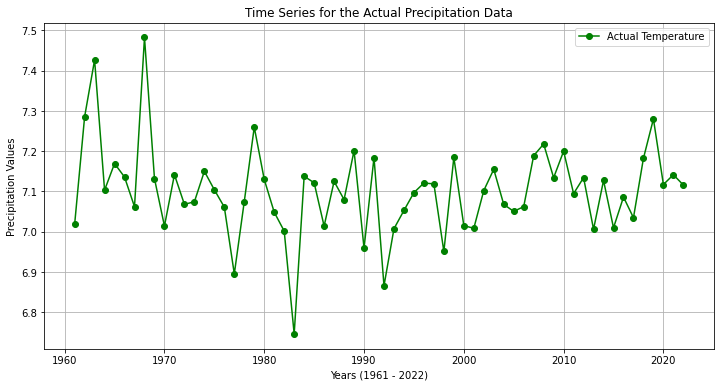

In [26]:
assert len(years) == len(normalized_data)
plt.figure(figsize=(12, 6))
plt.plot(years, normalized_data, label='Actual Temperature', color='green', marker='o')
plt.xlabel('Years (1961 - 2022)')
plt.ylabel('Precipitation Values')
plt.legend()
plt.grid(True)
plt.title('Time Series for the Actual Precipitation Data')
#plt.savefig('TIME_SERIES_PRECIPITATION.png', facecolor='w')
#plt.show()

## BOX PLOT FOR VISUALISATION OF THE ACTUAL DATA 

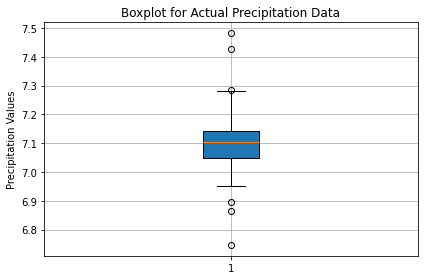

In [27]:
#plt.figure(figsize=(8, 6))
plt.boxplot(normalized_data, vert=True, patch_artist=True)
plt.title('Boxplot for Actual Precipitation Data')
plt.ylabel('Precipitation Values')
plt.grid(True)
plt.tight_layout()
#plt.savefig('CIR_BOXPLOT_ACTUAL_PRECIPITATION.png', facecolor='w')
plt.show()

## HISTOGRAM FOR VISUALISATION OF THE ACTUAL PRECIPITATION DATA 

Skewness = 0.33404307970510316


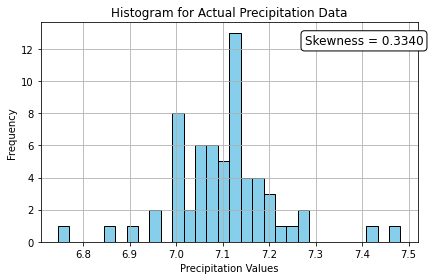

In [28]:
# plt.figure(figsize=(12, 6))
plt.hist(normalized_data, bins=30, edgecolor='black', color='skyblue')
plt.xlabel('Precipitation Values')
plt.ylabel('Frequency')
plt.title('Histogram for Actual Precipitation Data')
plt.grid(True)
plt.tight_layout()
skewness = stats.skew(normalized_data)
print('Skewness =', skewness)

plt.annotate(f'Skewness = {skewness:.4f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
plt.savefig('CIR_HISTOGRAM_ACTUAL_PRECIPITATION.png', facecolor='w')
#plt.show()

## PLOTTING THE ACTUAL AGAINST PREDICTED PRECIPITATION VALUES FOR VISUALISATION



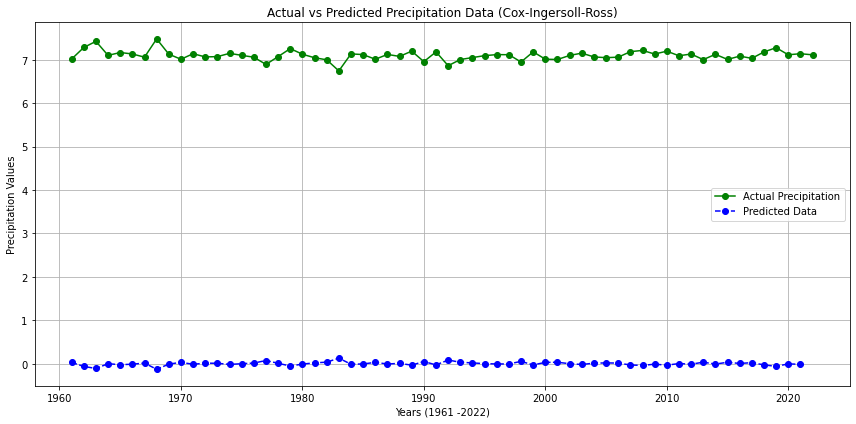

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(years, normalized_data, label='Actual Precipitation', color='green', marker='o')
plt.plot(years[:-1], X.dot(C_hat), label='Predicted Data', color='blue', marker='o', linestyle='--')
plt.xlabel('Years (1961 -2022)')
plt.ylabel('Precipitation Values')
plt.legend()
plt.grid(True)
plt.title('Actual vs Predicted Precipitation Data (Cox-Ingersoll-Ross)')
plt.tight_layout()
#plt.savefig('CIR_ACTUAL_VS_PREDICTED_PRECIPITATION.png', facecolor='w')
plt.show()

## PLOTTING THE PREDICTED VALUES FOR VISUALISATION


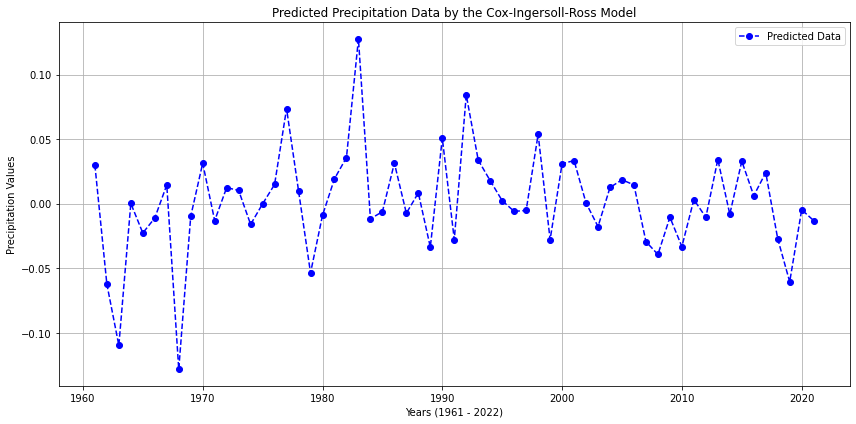

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(years[:-1], X.dot(C_hat), label='Predicted Data', color='blue', marker='o', linestyle='--')
plt.xlabel('Years (1961 - 2022)')
plt.ylabel('Precipitation Values')
plt.legend()
plt.grid(True)
plt.title('Predicted Precipitation Data by the Cox-Ingersoll-Ross Model')
plt.tight_layout()
#plt.savefig('CIR_PREDICTED_PRECIPITATION.png', facecolor='w')
plt.show()


## HISTOGRAM FOR VISUALISATION OF THE PREDICTED DATA 

Skewness = -0.22736430906957092


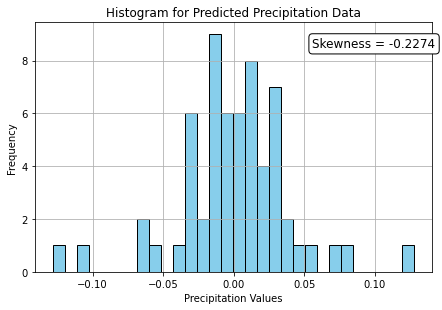

In [31]:
predicted_data = X.dot(C_hat)
plt.hist(predicted_data, bins=30, color='skyblue', edgecolor='black')
plt.grid(True)
plt.tight_layout()
plt.title('Histogram for Predicted Precipitation Data')
plt.xlabel('Precipitation Values')
plt.ylabel('Frequency')
skewness = stats.skew(predicted_data)
print('Skewness =', skewness)

plt.annotate(f'Skewness = {skewness:.4f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
#plt.savefig('CIR_HISTOGRAM_PREDICTED_PRECIPITATION.png', facecolor='w')
plt.show()

## DESCRIPTIVE STATISTICS FOR PREDICTED VALUES

In [32]:
predicted_data = X.dot(C_hat)
data_series = pd.Series(predicted_data)
descriptive_stats = data_series.describe()
print(descriptive_stats)

count    61.000000
mean      0.000917
std       0.039788
min      -0.128334
25%      -0.013159
50%       0.000190
75%       0.019271
max       0.127650
dtype: float64


## THE MONTE CARLO SIMULATION OF PATHS


In [33]:
def cir(T_0, gamma, Rbar, delta, T, N, M):
    dt = T / N
#     sqrt_dt = np.sqrt(dt)
    precip = np.zeros((M, N + 1))
    precip[:, 0] = R_0
    
    for i in range(N):
        dW_R = np.random.normal(0, dt, size=M)
        precip[:, i + 1] = np.maximum(0, precip[:, i]) + gamma * (Rbar - np.maximum(0, precip[:, i])) * dt + delta * np.sqrt(np.maximum(0, precip[:, i])) * dW_R

    return precip

# Parameters
M = 1000 # Number of paths for MC
T = 61 # Total time (61 years)
N = 61 # Number of steps
R_0 = normalized_data[0]
gamma = 0.9267227175571794 
Rbar = 7.103812260785402 
delta_hat = 0.042356808514400435 

# Time vector
t = np.linspace(0, T, N + 1)

# Simulate paths
precip = cir(R_0, gamma, Rbar, delta_hat, T, N, M)

# Compute mean path
mean_path_simul = np.mean(precip, axis=0)

## HISTOGRAM FOR ONE SIMULATED PRECIPITATION PATH 

Text(0.7, 0.9, 'Skewness = -0.3400')

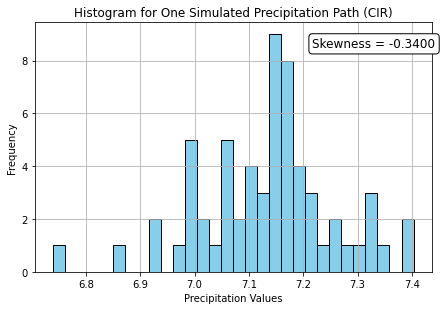

In [34]:
#plt.figure(figsize=(10, 6))
plt.hist(precip[0,:], bins=30, color='skyblue', edgecolor='black')
plt.grid(True)
plt.tight_layout()
plt.title('Histogram for One Simulated Precipitation Path (CIR)')
plt.xlabel('Precipitation Values')
plt.ylabel('Frequency')

skewness = stats.skew(precip[0,:])

plt.annotate(f'Skewness = {skewness:.4f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

#plt.savefig('CIR_HISTOGRAM_ONE_SIMULATED_PRECIPITATION.png', facecolor='w')
#plt.show()

## DESCRIPTIVE STATISTICS FOR ALL SIMULATED PATHS COMBINED

In [35]:
combined_data = precip.flatten()
combined_data_series = pd.Series(combined_data)
combined_stats = combined_data_series.describe()

print(combined_stats)

count    62000.000000
mean         7.101871
std          0.112432
min          6.633026
25%          7.022131
50%          7.100575
75%          7.178092
max          7.573134
dtype: float64


## PLOTTING THE GRAPH OF THOUSAND SIMULATED PATH FOR VISUALISATION


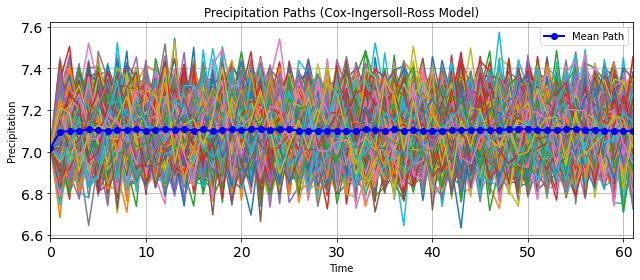

In [36]:
plt.figure(figsize=(9, 4))
for i in range(M):
    plt.plot(t, precip[i])  
plt.plot(t, mean_path_simul, color='blue', linewidth=2, label='Mean Path', marker='o')
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.title('Precipitation Paths (Cox-Ingersoll-Ross Model)')
plt.xlim([0, T])  
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.savefig('CIR_THOUSAND_PATHS_PRECIPITATION.png', facecolor='w')
#plt.show()

## PLOTTING THE MEAN OF SIMULATED PATHS OF PRECIPITATION FOR VISUALISATION

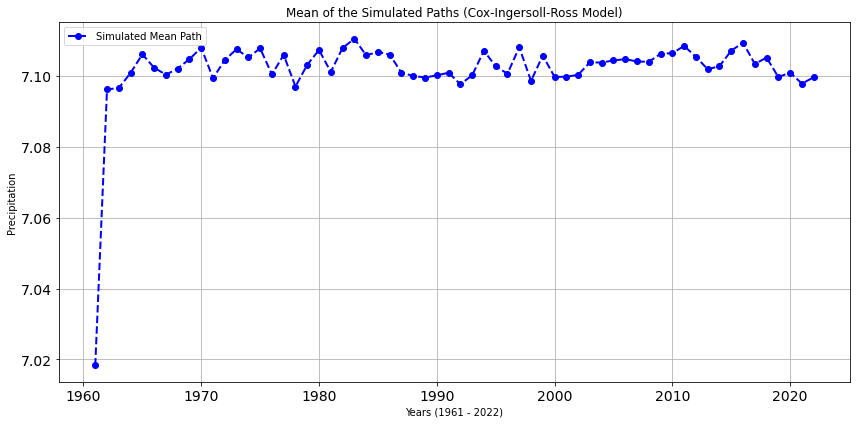

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(years, mean_path_simul, color='blue', linewidth=2, label='Simulated Mean Path', marker='o', linestyle='--')
plt.xlabel('Years (1961 - 2022)')
plt.ylabel('Precipitation')
plt.title('Mean of the Simulated Paths (Cox-Ingersoll-Ross Model)')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.legend()
#plt.savefig('CIR_MEAN_SIMUL_PRECIPITATION.png', facecolor='w')
plt.show()

## PLOTTING THE ACTUAL AGAINST MEAN OF SIMULATED PATHS OF PRECIPITATION FOR VISUALISATION

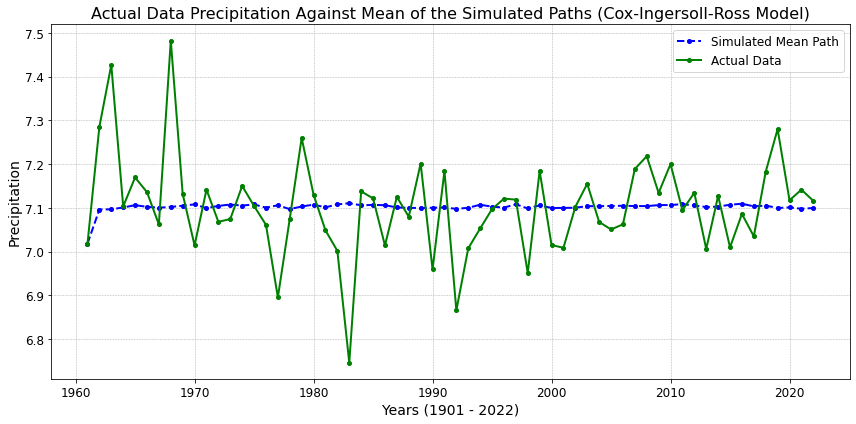

In [38]:
plt.figure(figsize=(12, 6)) 
plt.plot(years, mean_path_simul, color='blue', linewidth=2, linestyle='--', marker='o', markersize=4, label='Simulated Mean Path')
plt.plot(years, normalized_data, color='green', linewidth=2, marker='o', markersize=4, label='Actual Data')
plt.title('Actual Data Precipitation Against Mean of the Simulated Paths (Cox-Ingersoll-Ross Model)', fontsize=16)
plt.xlabel('Years (1901 - 2022)', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend(fontsize=12)
#plt.savefig('CIR_ACTUAL_VS_MEAN_SIMUL_PRECIPITATION.png', facecolor='w')
plt.show()

## PLOTTING THE ACTUAL DATA AGAINST ONE SIMULATED PATH FOR VISUALISATION

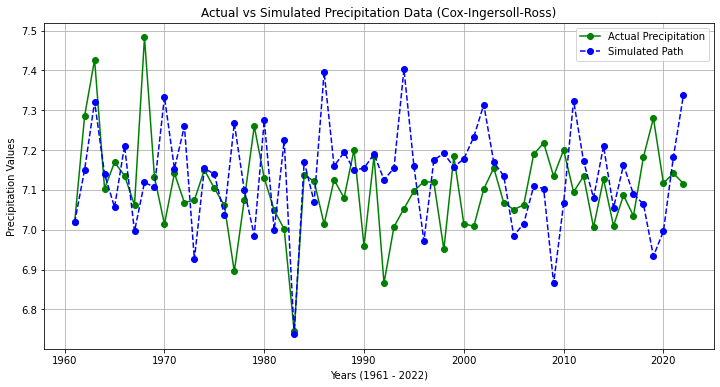

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(years, normalized_data, label='Actual Precipitation', color='green', marker='o')
plt.plot(years, precip[0], label='Simulated Path', color='blue', linestyle='--', marker='o')
plt.xlabel('Years (1961 - 2022)')
plt.ylabel('Precipitation Values')
plt.legend()
plt.grid(True)
plt.title('Actual vs Simulated Precipitation Data (Cox-Ingersoll-Ross)')
plt.savefig('CIR_ACTUAL_VS_ONE_SIMULATED_PRECIPITATION.png', facecolor='w')
#plt.show()

## BOX PLOT FOR VISUALISATION OF THE SIMULATED DATA 

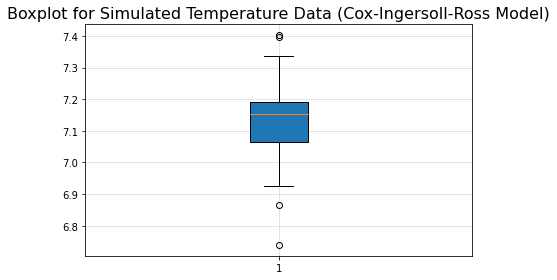

In [40]:
#plt.figure(figsize=(10, 6)) 
plt.boxplot(precip[0, :],vert=True, patch_artist=True)
plt.title('Boxplot for Simulated Temperature Data (Cox-Ingersoll-Ross Model)', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
#plt.savefig('CIR_BOXPLOT_SIMUL_PRECIPITATION.png', facecolor='w')
plt.show()

## HISTOGRAM FOR VISUALISATION OF THE SIMULATED DATA 

Skewness = -0.3399950797934494


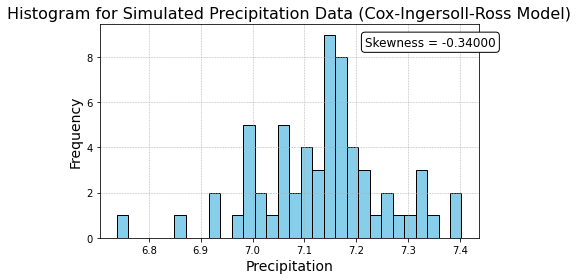

In [41]:
#plt.figure(figsize=(12, 8))
plt.hist(precip[0, :], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram for Simulated Precipitation Data (Cox-Ingersoll-Ross Model)', fontsize=16)
plt.xlabel('Precipitation', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
Skewness = stats.skew(precip[0, :])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
print('Skewness =', Skewness)
plt.annotate(f'Skewness = {skewness:.5f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

#plt.savefig('CIR_HISTOGRAM_SIMUL_TEMPERATURE.png', facecolor='w')
plt.show()

# PYTHON IMPLEMENTATION FOR PARAMETER VALUES OF THE CROP YIELD MODEL AFTER INCORPORATING TEMPERATURE

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
np.random.seed(12)

## THE PREPARATION AND IMPUTATION OF MY TEMPERATURE AND YIELD DATA 

In [43]:
#Temperature data
tt=pd.read_excel('my_research_temp_data.xlsx')
data_in = np.array(tt['Annual Mean'])
T=data_temp = data_in[-62:]
years = np.array(tt['Category'])

#Crop Yield data
pp=pd.read_csv('crop yield.csv')
data_crop = np.array(pp['Value'])
years = np.array(pp['Year'])

# Log transformation
def log_transform(data_crop):
    # Adding 1 to avoid log(0) if there are zero values
    data = np.log(data_crop + 1)
    return data
data = log_transform(data_crop)

## ESTIMATION OF THE PARMETERS FOR THE CROP YIELD MODEL

In [44]:
# Step 1: Computation of Y and X
def compute_Y_X(data, T, delta_t, K):
    n = len(data)
    if n <= 1:
        raise ValueError("Data length must be greater than 1")

    Y = np.zeros(n - 1)
    X = np.zeros((n - 1, 2))
    
    for i in range(n - 1):
        sqrt_T_i = np.sqrt(T[i])
        Y[i] = (data[i + 1] - data[i]) / sqrt_T_i
        X[i, 0] = (1 - np.exp(data[i]) / K) * (delta_t / sqrt_T_i)  
        X[i, 1] = -(delta_t / sqrt_T_i)                            
    
    return Y, X

# Step 2: Computation of C_hat
def compute_C_hat(Y, X, lambda_reg=1e-5):
    n, p = X.shape
    I = np.eye(p)
    X_transpose_X_reg = X.T @ X + lambda_reg * I
    X_transpose_X_inv = np.linalg.inv(X_transpose_X_reg)
    C_hat = X_transpose_X_inv @ X.T @ Y
    return C_hat

# Step 3: Computation of Parameters
def compute_parameters(data, T, delta_t, K, lambda_reg=1e-5):
    Y, X = compute_Y_X(data, T, delta_t, K)
    C_hat = compute_C_hat(Y, X, lambda_reg)
    
    r = C_hat[0]
    sigma = -C_hat[1]
    
    # Predicted Model Y
    Y_pred = X @ C_hat
    residuals = Y - Y_pred
    
    # Calculation of Mean Squared Error (MSE)
    summ_sq_r = np.sum(residuals ** 2)
    total_summ_sq = np.sum((Y - np.mean(Y)) ** 2)
    mse = summ_sq_r / len(Y)
    
    print(f'Sum of Squared Errors: {summ_sq_r}')
    print(f'Total Sum of Squares: {total_summ_sq}')
    print(f'MSE: {round(mse * 100, 4)}%')
    
    # Estimate sigma_T from residuals
    sigma_T = np.sqrt(np.var(residuals) / delta_t)
    
    return r, sigma, sigma_T

delta_t = 1  # Time step
K = max(data)  # The carrying capacity

Y_pred = X @ C_hat

# Compute parameters
r, sigma, sigma_T = compute_parameters(data, T, delta_t, K)
print(f'My Estimated Params are: [r: {r}, sigma: {sigma}, sigma_T: {sigma_T}]')

Sum of Squared Errors: 0.07283789238160787
Total Sum of Squares: 0.0745306738613303
MSE: 0.1194%
My Estimated Params are: [r: 6.540839871790122e-05, sigma: 0.10508962980192249, sigma_T: 0.03455517884989635]


# PYTHON IMPLEMENTATION FOR PARAMETER VALUES OF THE CROP YIELD MODEL AFTER INCORPORATING PRECIPITATION

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
np.random.seed(12)

## THE PREPARATION AND IMPUTATION OF MY PRECIPITATION AND YIELD DATA 

In [46]:
#Precipitation data
rr=pd.read_csv('observed-annual-precipitation-of-ghana-for-1901-2022.csv')
data_inn = np.array(rr['Annual Mean'])
data_precip = data_inn[-62:]
yrs = np.array(rr['Category'])
years = yrs[-62:]

# Log transformation
def log_transform(data_precip):
    # Adding 1 to avoid log(0) if there are zero values
    R = np.log(data_precip + 1)
    return R

R = log_transform(data_precip)


#Crop Yield data
pp=pd.read_csv('crop yield.csv')
data_crop = np.array(pp['Value'])
years = np.array(pp['Year'])

# Log transformation
def log_transform(data_crop):
    # Adding 1 to avoid log(0) if there are zero values
    data = np.log(data_crop + 1)
    return data

data = log_transform(data_crop)

## ESTIMATION OF PARAMETERS FOR THE CROP YIELD MODEL

In [47]:
# Step 1: Computation of Y and X
def compute_Y_X(data, R, delta_t, K):
    n = len(data)
    if n <= 1:
        raise ValueError("Data length must be greater than 1")

    Y = np.zeros(n - 1)
    X = np.zeros((n - 1, 2))
    
    for i in range(n - 1):
        sqrt_R_i = np.sqrt(R[i])
        Y[i] = (data[i + 1] - data[i]) / sqrt_R_i
        X[i, 0] = (1 - np.exp(data[i]) / K) * (delta_t / sqrt_R_i)  
        X[i, 1] = -(delta_t / sqrt_R_i)                            
    
    return Y, X

# Step 2: Computation of C_hat
def compute_C_hat(Y, X, lambda_reg=1e-5):
    n, p = X.shape
    I = np.eye(p)
    X_transpose_X_reg = X.T @ X + lambda_reg * I
    X_transpose_X_inv = np.linalg.inv(X_transpose_X_reg)
    C_hat = X_transpose_X_inv @ X.T @ Y
    return C_hat

# Step 3: Computation of Parameters
def compute_parameters(data, R, delta_t, K, lambda_reg=1e-5):
    Y, X = compute_Y_X(data, R, delta_t, K)
    C_hat = compute_C_hat(Y, X, lambda_reg)
    
    r = C_hat[0]
    sigma = -C_hat[1]
    
    # Predicted Model Y
    Y_pred = X @ C_hat
    residuals = Y - Y_pred
    
    # Calculation of Mean Squared Error (MSE)
    summ_sq_r = np.sum(residuals ** 2)
    total_summ_sq = np.sum((Y - np.mean(Y)) ** 2)
    mse = summ_sq_r / len(Y)
    
    print(f'Sum of Squared Errors: {summ_sq_r}')
    print(f'Total Sum of Squares: {total_summ_sq}')
    print(f'MSE: {round(mse * 100, 4)}%')
    
    # Estimate sigma_T from residuals
    sigma_R = np.sqrt(np.var(residuals) / delta_t)
    
    return r, sigma, sigma_R

delta_t = 1  # Time step
K = max(data)  # The carrying capacity

# Compute parameters
r, sigma, sigma_R = compute_parameters(data, R, delta_t, K)
print(f'My Estimated Params are: [r: {r}, sigma: {sigma}, sigma_R: {sigma_R}]')

Sum of Squared Errors: 0.2861154102074147
Total Sum of Squares: 0.2936348202728435
MSE: 0.469%
My Estimated Params are: [r: 6.905111233245001e-05, sigma: 0.11145631789946434, sigma_R: 0.06848646965721494]


## PLOTTING THE ACTUAL MAIZE YIELD DATA FOR VISUALISATION

Text(0.5, 1.0, 'Time Series for the Actual Maize Yield Data')

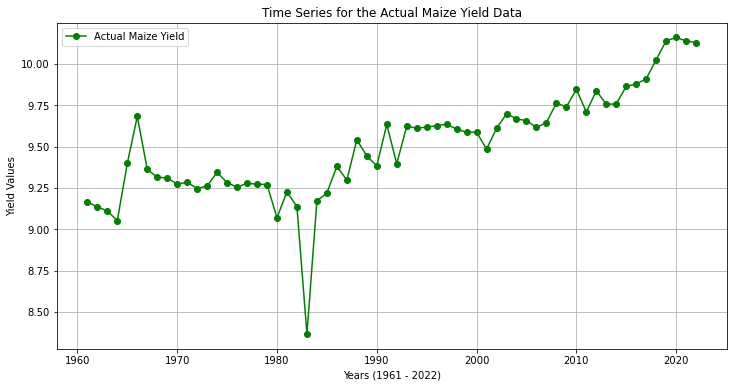

In [48]:
assert len(years) == len(data)
plt.figure(figsize=(12, 6))
plt.plot(years, data, label='Actual Maize Yield', color='green', marker='o')
plt.xlabel('Years (1961 - 2022)')
plt.ylabel('Yield Values')
plt.legend()
plt.grid(True)
plt.title('Time Series for the Actual Maize Yield Data')
#plt.savefig('TIME_SERIES_MAIZE_YIELD.png', facecolor='w')
#plt.show()

## HISTOGRAM FOR VISUALISATION OF THE ACTUAL YIELD DATA 

Skewness = -0.30474234838995035


Text(0.7, 0.9, 'Skewness = -0.3047')

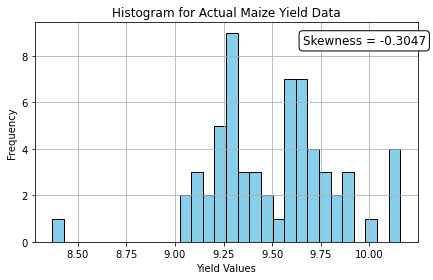

In [49]:
# plt.figure(figsize=(10, 5))
plt.hist(data, bins=30, edgecolor='black',color='skyblue')
plt.xlabel('Yield Values')
plt.ylabel('Frequency')
plt.title('Histogram for Actual Maize Yield Data')
plt.grid(True)
plt.tight_layout()

skewness = stats.skew(data)
print('Skewness =', skewness)

plt.annotate(f'Skewness = {skewness:.4f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

#plt.savefig('CIR_HISTOGRAM_ACTUAL_MAIZE_YIELD.png', facecolor='w')
#plt.show()

# SIMULATION FOR CROP YIELD AGAINST TEMPERATURE

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(12)

In [51]:
def simulate_T_Z(T_0, Z_0, delta_t, alpha, beta, bar_T, r, sigma, sigma_T, K, num_steps):
    T = np.zeros(num_steps)
    Z = np.zeros(num_steps)
    T[0] = T_0
    Z[0] = Z_0
    
    for i in range(num_steps - 1):
        sqrt_T_i = np.sqrt(T[i]) if T[i] > 0 else 0  # Ensure non-negative sqrt
     
        # Simulating for Temperature (T)
        T_det = alpha * (bar_T - T[i]) * delta_t
        T_stoch = beta * sqrt_T_i * np.sqrt(delta_t) * np.random.normal(0, 1)
        T[i + 1] = T[i] + T_det + T_stoch

        # Ensure T is non-negative
        if T[i + 1] < 0:
            T[i + 1] = 0
        
        # Simulate for Crop Yield (Z)
        Z_det = (r * (1 - np.exp(Z[i]) / K) - sigma) * delta_t
        Z_stoch = (sigma_T * sqrt_T_i) * np.sqrt(delta_t) * np.random.normal(0, 1)
        Z[i + 1] = Z[i] + Z_det + Z_stoch
    
    return T, Z

# Parameters
delta_t = 1
alpha = 0.2886376653569112 # Rate of reversion to mean temperature
beta = 0.05536454156752402 # Volatility in temperature
bar_T = 27.463908417676507 # mean temperature
r = 6.540839871790122e-05  # Growth rate
sigma = 0.10508962980192249 # Parameter sigma
K = 10.159253170667593
T_0 = 26.98                   # Initial temperature
initial_yield = 9.16293425
Z_0 = np.log(initial_yield)
num_steps = 61  # Number of time steps


# Sensitivity analysis for sigma_T
sigma_T_values = np.linspace(0.01, 0.1, 5)
# Storage for results
all_T = []
all_Z = []
mean_T = []
mean_Z = []

# Run simulations for each value of sigma_T
for sigma_T in sigma_T_values:
    T, Z = simulate_T_Z(T_0, Z_0, delta_t, alpha, beta, bar_T, r, sigma, sigma_T, K, num_steps)
    all_T.append(T)
    all_Z.append(Z)
    mean_T.append(np.mean(T))
    mean_Z.append(np.mean(np.exp(Z)))  # Converting log yield back to yield  

## PLOTTING OF THE SIMULATION RESULTS

        sigma_T  Mean_Temperature  Mean_Yield
count  5.000000          5.000000    5.000000
mean   0.055000         27.426804    1.183658
std    0.035576          0.183663    0.424008
min    0.010000         27.244378    0.677269
25%    0.032500         27.320869    0.870715
50%    0.055000         27.334485    1.289322
75%    0.077500         27.548425    1.318071
max    0.100000         27.685864    1.762914
For low sigma_T scenario:
   sigma_T  Mean_Temperature  Mean_Yield
0     0.01         27.334485    1.318071
For high sigma_T scenario:
   sigma_T  Mean_Temperature  Mean_Yield
4      0.1         27.685864    0.870715


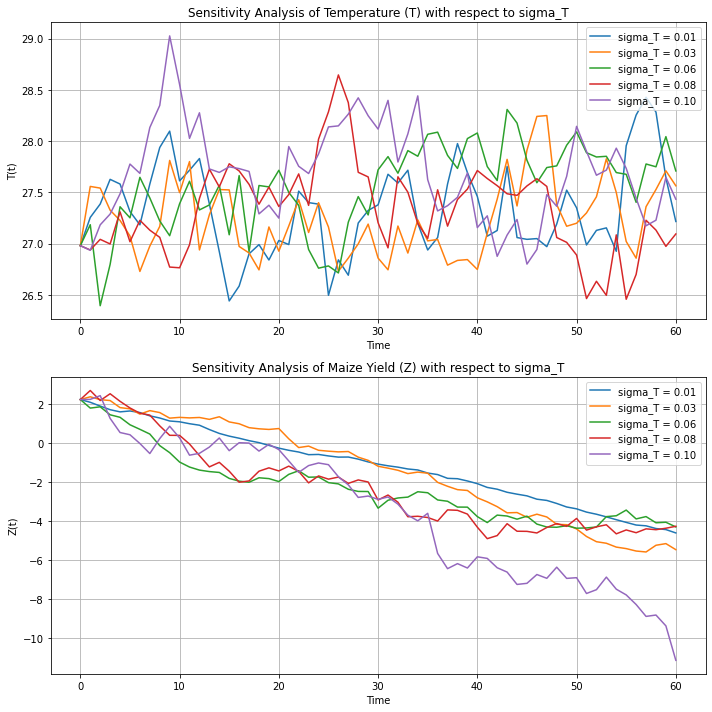

In [52]:
time = np.arange(num_steps) * delta_t
plt.figure(figsize=(10, 10))

# Plot for Temperature (T)
plt.subplot(2, 1, 1)
for i, sigma_T in enumerate(sigma_T_values):
    plt.plot(time, all_T[i], label=f'sigma_T = {sigma_T:.2f}')
plt.xlabel('Time')
plt.ylabel('T(t)')
plt.title('Sensitivity Analysis of Temperature (T) with respect to sigma_T')
plt.grid(True)
plt.legend()

# Plot for Maize Yield (Z)
plt.subplot(2, 1, 2)
for i, sigma_T in enumerate(sigma_T_values):
    plt.plot(time, all_Z[i], label=f'sigma_T = {sigma_T:.2f}')
plt.xlabel('Time')
plt.ylabel('Z(t)')
plt.title('Sensitivity Analysis of Maize Yield (Z) with respect to sigma_T')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('SENSITIVITY_ANALYSIS_TEMP_YIELD.png', facecolor='w')
#plt.show()

# Interpretation
low_sigma_T = sigma_T_values[0]
high_sigma_T = sigma_T_values[-1]

# Create a DataFrame for easy analysis
results = pd.DataFrame({
    'sigma_T': sigma_T_values,
    'Mean_Temperature': mean_T,
    'Mean_Yield': mean_Z
})

# Display summary statistics
print(results.describe())


low_sigma_T_result = results[results['sigma_T'] == low_sigma_T]
high_sigma_T_result = results[results['sigma_T'] == high_sigma_T]

print("For low sigma_T scenario:")
print(low_sigma_T_result)
print("For high sigma_T scenario:")
print(high_sigma_T_result)

# SIMULATION FOR CROP YIELD AGAINST PRECIPITATION

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(12)

In [54]:
def simulate_R_Z(R_0, Z_0, delta_t, gamma, delta_hat, Rbar, r, sigma, sigma_R, K, num_steps):
    R = np.zeros(num_steps)
    Z = np.zeros(num_steps)
    R[0] = R_0
    Z[0] = Z_0
    
    
    for i in range(num_steps - 1):
        sqrt_T_i = np.sqrt(T[i]) if T[i] > 0 else 0  # Ensure non-negative sqrt
    
        sqrt_R_i = np.sqrt(R[i])
        
        # Simulating for Precipitation (R)
        R_det = gamma * (Rbar - R[i]) * delta_t
        R_stoch = delta_hat * sqrt_R_i * np.sqrt(delta_t) * np.random.normal(0, 1)
        R[i + 1] = R[i] + R_det + R_stoch
        
        #Ensure T is non-negative
        if R[i + 1] < 0:
            R[i + 1] = 0
        
        # Simulating for Crop Yield (Z)
        Z_det = (r * (1 - np.exp(Z[i]) / K) - sigma) * delta_t
        Z_stoch = sigma_R * sqrt_R_i * np.sqrt(delta_t) * np.random.normal(0, 1)
        Z[i + 1] = Z[i] + Z_det + Z_stoch
    
    return R, Z

# Parameters 
delta_t = 1  # Time step
gamma = 0.9267227175571794  # Rate of reversion to mean precipitation
delta_hat =  0.042356808514400435 # Volatility in precipitation
Rbar = 7.103812260785402  # Mean precipitation
r =  6.905111233245001e-05 # Growth rate
sigma =  0.11145631789946434 # Parameter sigma
#sigma_R = 0.06848646965721494  # Sigma for precipitation variability
K = 10.159253170667593  # Carrying capacity
R_0 = 7.01830332  # Initial precipitation
initial_yield = 9.16293425  
Z_0 = np.log(initial_yield)  
num_steps = 61  # Number of time steps

# Sensitivity analysis for sigma_R
sigma_R_values = np.linspace(0.04, 0.1, 5)
# Storage for results
all_R = []
all_Z = []
mean_R = []
mean_Z = []

# Run simulations for each value of sigma_R
for sigma_R in sigma_R_values:
    R, Z = simulate_R_Z(R_0, Z_0, delta_t, gamma, delta_hat, Rbar, r, sigma, sigma_R, K, num_steps)
    all_R.append(R)
    all_Z.append(Z)
    mean_R.append(np.mean(R))
    mean_Z.append(np.mean(np.exp(Z)))  # Converting log yield back to yield  

##  PLOTTING OF THE SIMULATION RESULT

        sigma_R  Mean_Precipitation  Mean_Yield
count  5.000000            5.000000    5.000000
mean   0.070000            7.100897    1.160929
std    0.023717            0.022643    0.304810
min    0.040000            7.079562    0.813172
25%    0.055000            7.086437    1.017149
50%    0.070000            7.089138    1.105186
75%    0.085000            7.117003    1.238146
max    0.100000            7.132344    1.630992
For low sigma_R scenario:
   sigma_R  Mean_Precipitation  Mean_Yield
0     0.04            7.089138    1.105186
For high sigma_R scenario:
   sigma_R  Mean_Precipitation  Mean_Yield
4      0.1            7.132344    1.017149


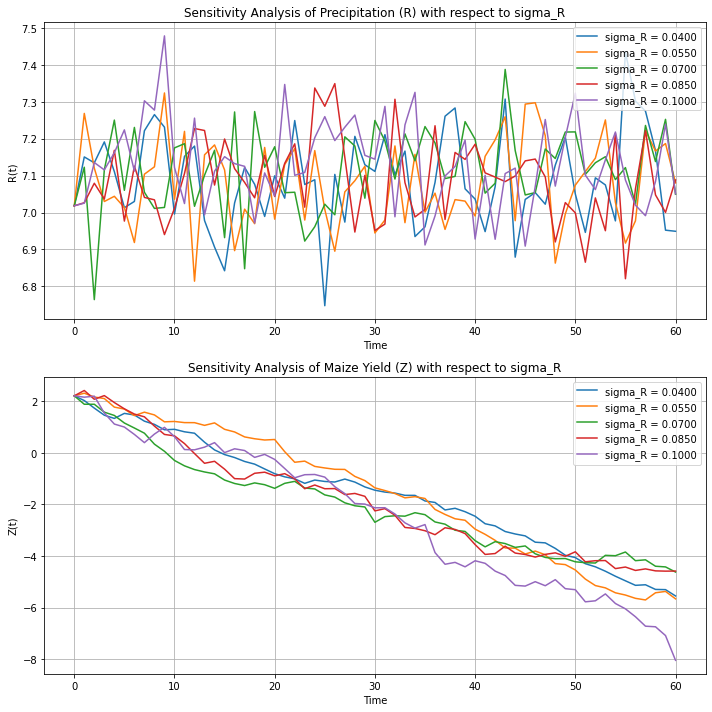

In [55]:
time = np.arange(num_steps) * delta_t
plt.figure(figsize=(10, 10))

# Plot for Precipitation (R)
plt.subplot(2, 1, 1)
for i, sigma_R in enumerate(sigma_R_values):
    plt.plot(time, all_R[i], label=f'sigma_R = {sigma_R:.4f}')
plt.xlabel('Time')
plt.ylabel('R(t)')
plt.title('Sensitivity Analysis of Precipitation (R) with respect to sigma_R')
plt.grid(True)
plt.legend()

# Plot for Maize Yield (Z)
plt.subplot(2, 1, 2)
for i, sigma_R in enumerate(sigma_R_values):
    plt.plot(time, all_Z[i], label=f'sigma_R = {sigma_R:.4f}')
plt.xlabel('Time')
plt.ylabel('Z(t)')
plt.title('Sensitivity Analysis of Maize Yield (Z) with respect to sigma_R')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('SENSITIVITY_ANALYSIS_PRECIP_YIELD.png', facecolor='w')
#plt.show()

# Interpretation
low_sigma_R = sigma_R_values[0]
high_sigma_R = sigma_R_values[-1]

# Create a DataFrame for easy analysis
results = pd.DataFrame({
    'sigma_R': sigma_R_values,
    'Mean_Precipitation': mean_R,
    'Mean_Yield': mean_Z
})

# Display summary statistics
print(results.describe())


low_sigma_R_result = results[results['sigma_R'] == low_sigma_R]
high_sigma_R_result = results[results['sigma_R'] == high_sigma_R]

print("For low sigma_R scenario:")
print(low_sigma_R_result)
print("For high sigma_R scenario:")
print(high_sigma_R_result)